<h1>Task 1 - Data Science and Business Analytics</h1>
<h2>Author: Riju Ray</h2>
<h3>GRIP Internship - The Sparks Foundation</h3>


## **Linear Regression with Python Scikit Learn**
In this task I will use the concept of **Simple Linear Regression** using the scikit learn library for Python.
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### **Importing the libraries and loading the dataset**

In [1]:
#importing all the required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#obtaining the data from the given link
url = "http://bit.ly/w-data"
sdata = pd.read_csv(url)
sdata
print(sdata,"\n\nData imported successfully")

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86 

Data imported successfully


In [3]:
sdata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
sdata.isnull().sum() #checking for missing values 

Hours     0
Scores    0
dtype: int64

Clearly, there are no missing values , hence we can proceed further.

In [5]:
sdata.dtypes #inspecting data type

Hours     float64
Scores      int64
dtype: object

In [6]:
#correcting data type for accurate results
sdata['Scores']=sdata['Scores'].astype('float')
sdata.dtypes

Hours     float64
Scores    float64
dtype: object

In [7]:
sdata.corr()  #checking the correlation to confirm strong relationship

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**The correlation coefficient is very close to 1, hence it indicates a very strong positive relation**

### **Data Visualization**

Text(0.5, 0, 'Hours Studied')

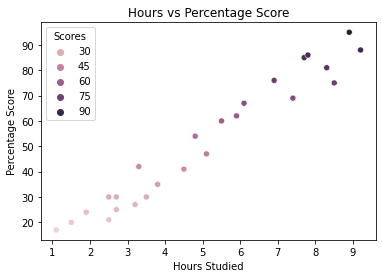

In [8]:
#plotting the distribution of Scores against the hours studied for each student
sns.scatterplot(x='Hours',y='Scores',data=sdata, hue='Scores')
plt.title('Hours vs Percentage Score')
plt.ylabel('Percentage Score')
plt.xlabel('Hours Studied')


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

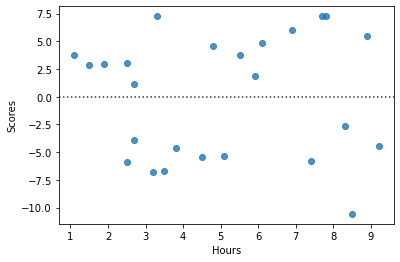

In [9]:
#confirming the linear relationship with a residual plot
sns.residplot(x='Hours',y='Scores',data=sdata) 

**An evenly distributed residual plots proves the linear relationship between Hours Studied and Percentage of Score**  

### **Preparing the data for training into the model**


The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
X=sdata['Hours'].values.reshape(-1,1)
Y=sdata['Scores'].values
X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [12]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, Y_train) 

print("Data Trained.")

Data Trained.


<AxesSubplot:>

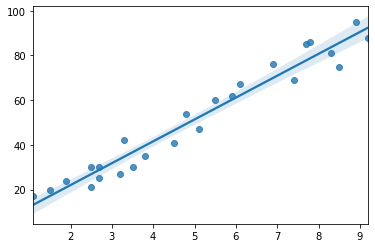

In [13]:
#Plotting the regression plot to visualise the target array
sns.regplot(x=X,y=Y)

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [14]:
print(X_test) # Testing data - In Hours
Y_pred = lm.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


<AxesSubplot:ylabel='Density'>

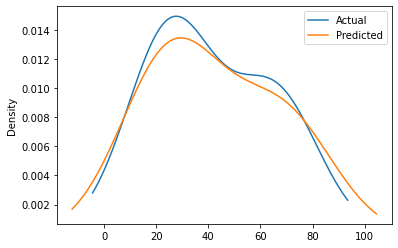

In [16]:
#visually representing the accuracy of predicted values
df.plot(kind='kde')

In [20]:
#trying with user defined data
Hours= input("Enter the no of hours you have studied: ")
hour=float(Hours)
ar=[[hour]]
user_pred=lm.predict(ar)
score=user_pred[0]
print("You will score around ",score)

Enter the no of hours you have studied: 9.25
You will score around  93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975


In [19]:
print('Root Mean Squared Error is: ',metrics.mean_squared_error(Y_test,Y_pred))
print('Root Mean Squared Error is: ',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Root Mean Squared Error is:  21.5987693072174
Root Mean Squared Error is:  4.6474476121003665
